In [1]:
%%capture
!pip install segmentation_models_pytorch

In [2]:
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=username&password=password&submit=Login' https://www.cityscapes-dataset.com/login/
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=1
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3

--2022-06-14 06:27:52--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2022-06-14 06:27:54--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [  <=>               ]  47.35K   210KB/s    in 0.2s    

2022-06-14 06:27:54 (210 KB/s) - ‘index.html’ saved [48483]

--2022-06-14 06:27:54--  https://www.cityscapes-dataset.com/file-handling/?packageID=1
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8

In [3]:
%%capture

!unzip -o gtFine_trainvaltest.zip
!unzip -o leftImg8bit_trainvaltest.zip

!mkdir cityscapes
!mv gtFine cityscapes/gtFine
!mv leftImg8bit cityscapes/leftImg8bit

In [4]:
from cs_data import cityscapesLoader

import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp

batch_size=1
num_workers=1

In [5]:
train_data = cityscapesLoader(split='train', split_limit=500)
val_data = cityscapesLoader(split='val')

Found 500 train images
Found 500 val images


In [6]:
train_loader = DataLoader(
    train_data,
    batch_size = batch_size,
    shuffle=True,
    num_workers = num_workers,
)

val_loader = DataLoader(
    val_data,
    batch_size = batch_size,
    shuffle=True,
    num_workers = num_workers,
)

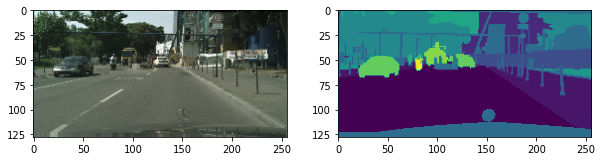

In [7]:
img, lbl = next(iter(val_loader))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img[0].detach().cpu().numpy().transpose(1,2,0).astype(int))
plt.subplot(1,2,2)
plt.imshow(lbl[0].detach().cpu().numpy().astype(int))
plt.show()

### Victim model

In [8]:
def decode_pred(pred):
    s1 = pred.shape[2]
    s2 = pred.shape[3]

    pred_np = np.zeros((s1, s2))

    for x in range(s1):
        for y in range(s2):
            pred_np[x,y] = torch.argmax(pred[0,:,x,y]).item()

    return pred_np

In [13]:
victim_model = smp.Unet(
    encoder_name="mobilenet_v2",
    in_channels=3,
    classes=19,
).cuda()


opt = torch.optim.Adam(victim_model.parameters(), lr=5e-5, betas=(0.9, 0.999))
criterion = smp.losses.DiceLoss('multiclass')
# criterion = smp.losses.JaccardLoss('multiclass')

EPOCH 0 --------------------
WARN: resizing labels yielded fewer classes
training loss: 0.6122
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.5815
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.5581
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.5468
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.5405
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yie

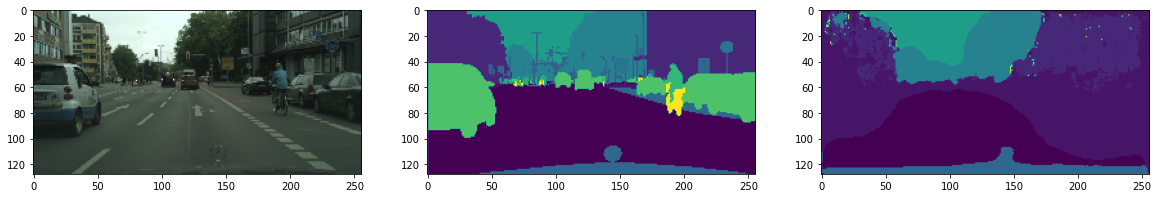

EPOCH 1 --------------------
WARN: resizing labels yielded fewer classes
training loss: 0.4881
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.4844
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.4772
WARN: resizing labels yielded fewer classes
training loss: 0.4706
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.4647
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yie

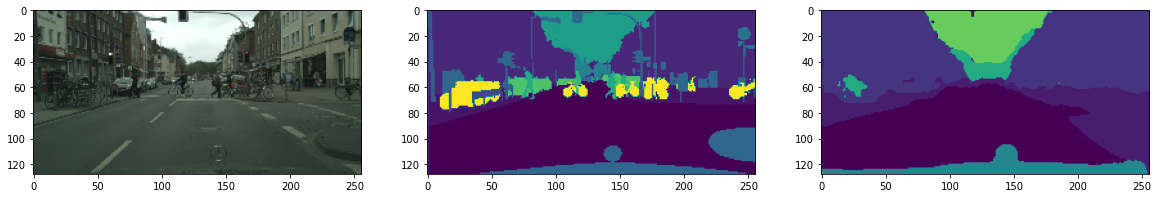

EPOCH 2 --------------------
WARN: resizing labels yielded fewer classes
training loss: 0.4369
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.4302
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.4296
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.4299
WARN: resizing labels yielded fewer classes
training loss: 0.4291
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yie

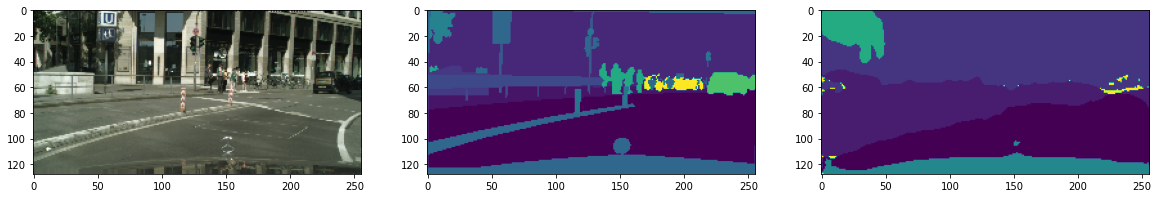

EPOCH 3 --------------------
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.4114
WARN: resizing labels yielded fewer classes
training loss: 0.401
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.4016
WARN: resizing labels yielded fewer classes
training loss: 0.3976
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3964
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yiel

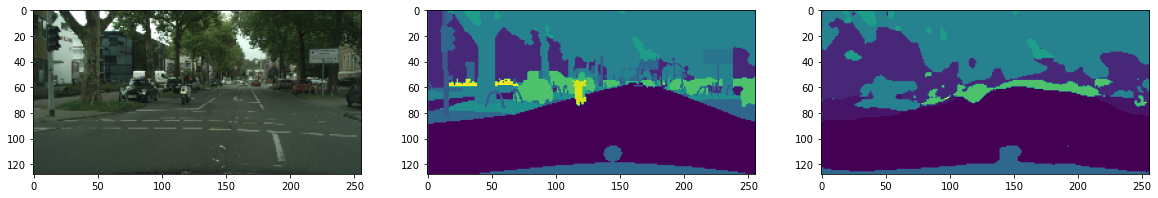

EPOCH 4 --------------------
WARN: resizing labels yielded fewer classes
training loss: 0.3883
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3838
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3806
training loss: 0.3797
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3791
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yie

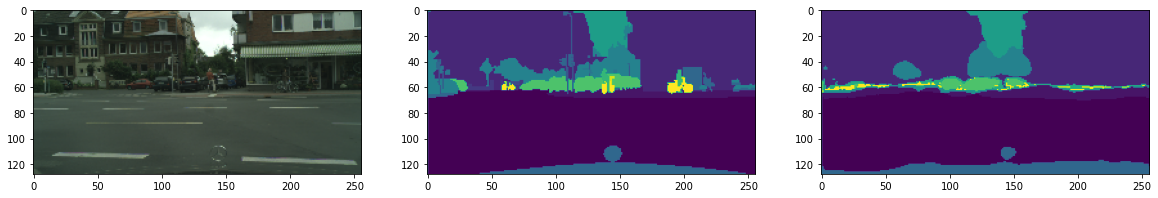

EPOCH 5 --------------------
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3652
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3635
WARN: resizing labels yielded fewer classes
training loss: 0.3639
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3663
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3632
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yie

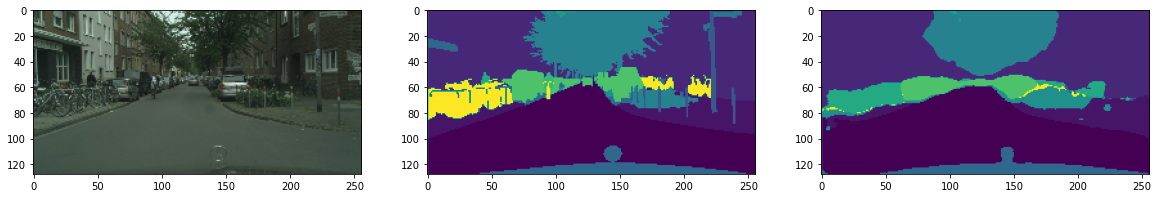

EPOCH 6 --------------------
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3509
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3512
training loss: 0.3515
training loss: 0.3499
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3491
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yie

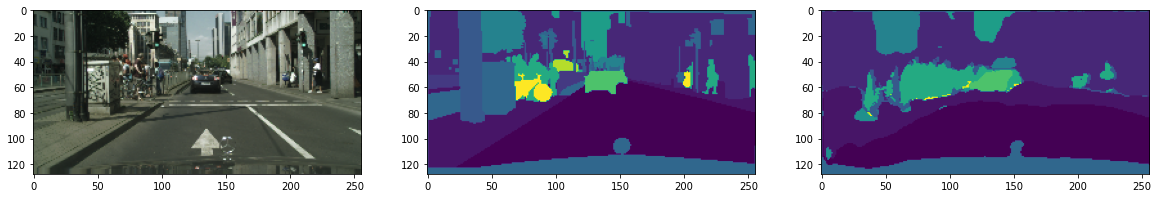

EPOCH 7 --------------------
WARN: resizing labels yielded fewer classes
training loss: 0.3347
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3389
WARN: resizing labels yielded fewer classes
training loss: 0.3391
training loss: 0.3411
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3358
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yie

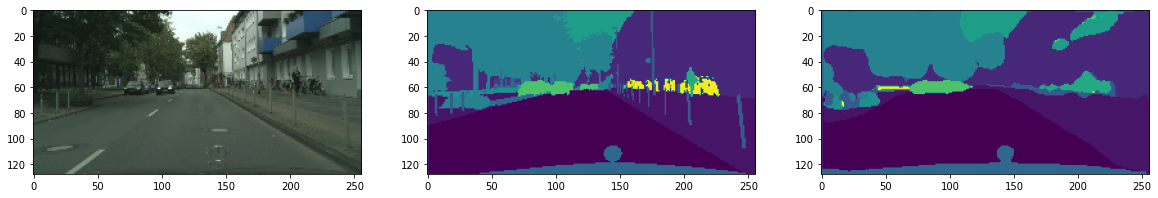

EPOCH 8 --------------------
training loss: 0.3207
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3255
training loss: 0.3258
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3275
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3231
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yie

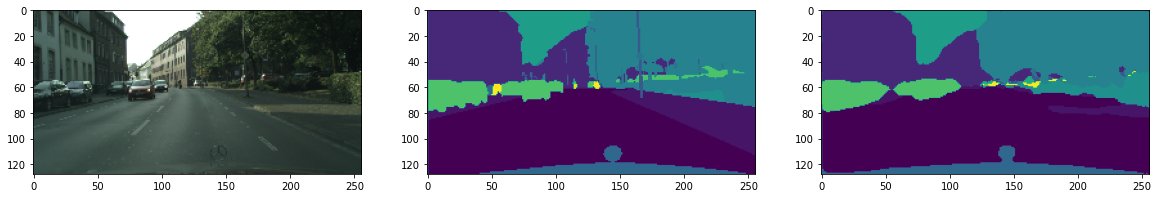

EPOCH 9 --------------------
WARN: resizing labels yielded fewer classes
training loss: 0.3005
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3016
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.307
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3118
WARN: resizing labels yielded fewer classes
training loss: 0.3121
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yiel

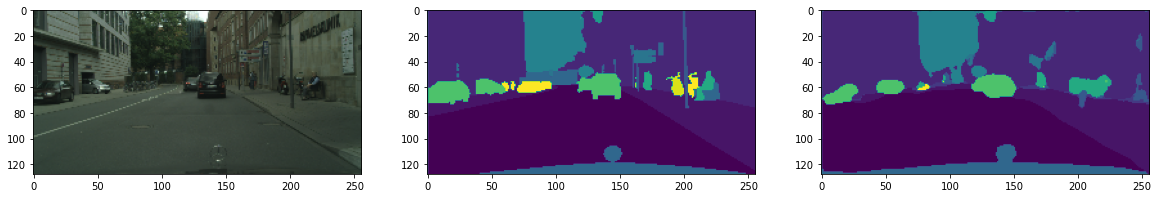

EPOCH 10 --------------------
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2966
WARN: resizing labels yielded fewer classes
training loss: 0.297
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.3005
training loss: 0.2983
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2986
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yie

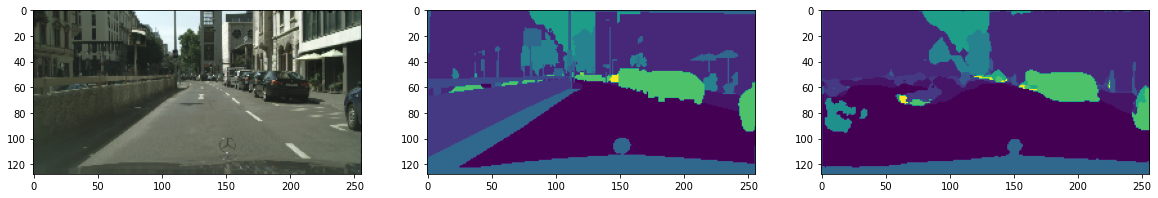

EPOCH 11 --------------------
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2829
WARN: resizing labels yielded fewer classes
training loss: 0.2843
WARN: resizing labels yielded fewer classes
training loss: 0.2837
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2856
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2877
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yi

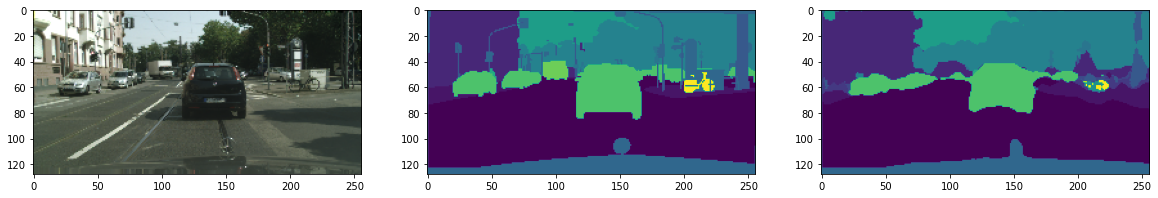

EPOCH 12 --------------------
WARN: resizing labels yielded fewer classes
training loss: 0.2788
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2882
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2787
WARN: resizing labels yielded fewer classes
training loss: 0.2757
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.277
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yie

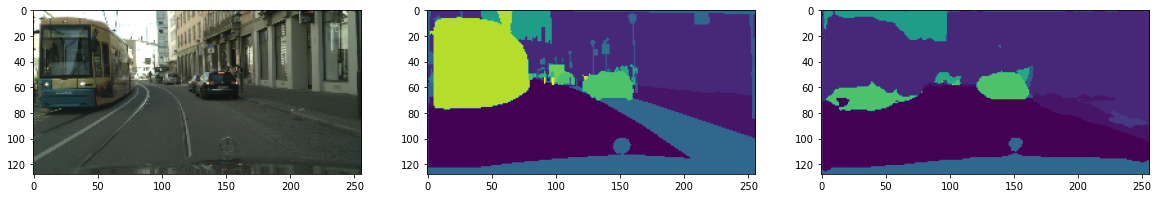

EPOCH 13 --------------------
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2621
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2641
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2654
WARN: resizing labels yielded fewer classes
training loss: 0.2665
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2691
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yi

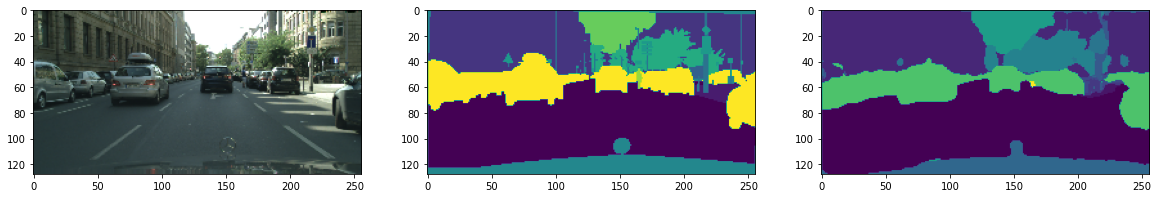

EPOCH 14 --------------------
WARN: resizing labels yielded fewer classes
training loss: 0.2772
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2694
WARN: resizing labels yielded fewer classes
training loss: 0.2657
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2631
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2627
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yi

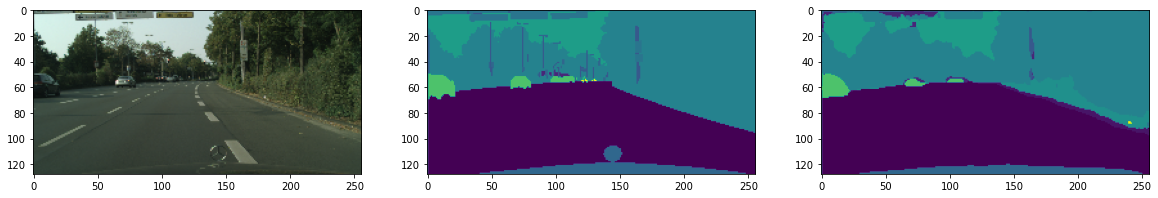

EPOCH 15 --------------------
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2595
WARN: resizing labels yielded fewer classes
training loss: 0.2642
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2593
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2598
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2579
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yi

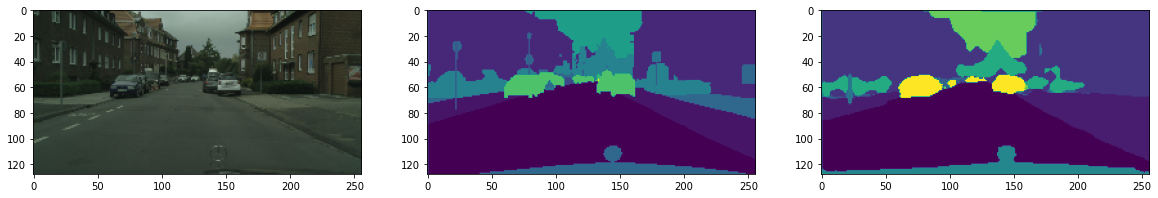

EPOCH 16 --------------------
training loss: 0.2401
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.246
WARN: resizing labels yielded fewer classes
training loss: 0.2496
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.253
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2515
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yiel

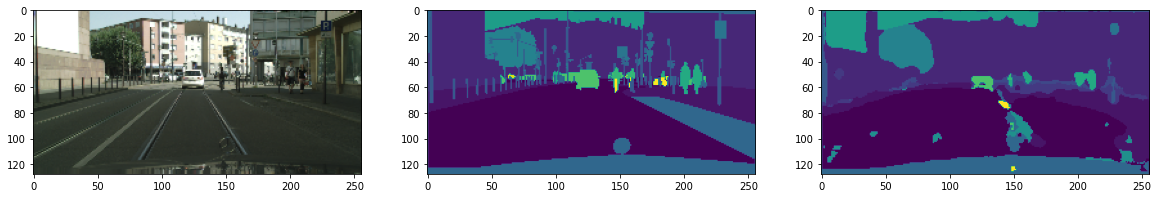

EPOCH 17 --------------------
WARN: resizing labels yielded fewer classes
training loss: 0.2328
WARN: resizing labels yielded fewer classes
training loss: 0.2365
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.243
training loss: 0.247
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2474
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yiel

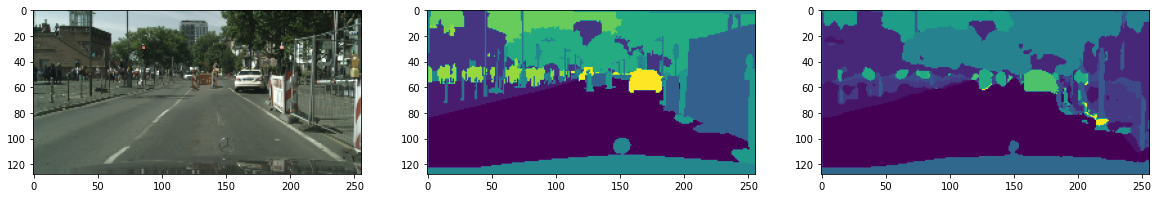

EPOCH 18 --------------------
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2316
WARN: resizing labels yielded fewer classes
training loss: 0.2384
WARN: resizing labels yielded fewer classes
training loss: 0.2369
WARN: resizing labels yielded fewer classes
training loss: 0.2415
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2427
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yi

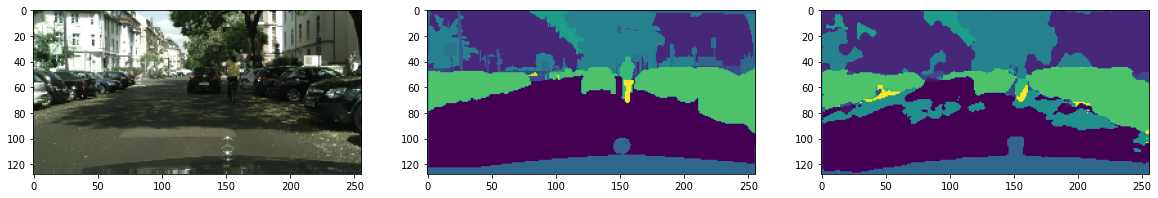

EPOCH 19 --------------------
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2329
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.2363
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
training loss: 0.239
WARN: resizing labels yielded fewer classes
training loss: 0.2395
training loss: 0.2383
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yie

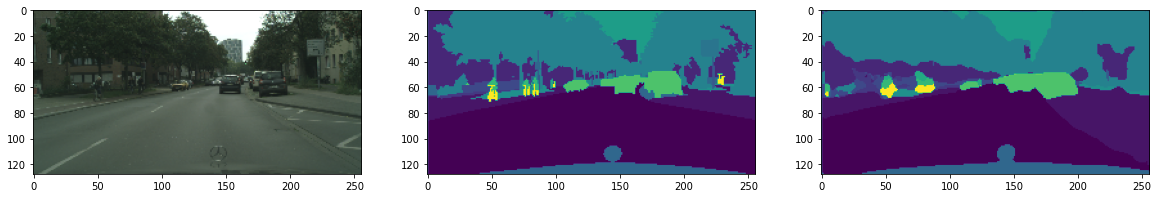

In [14]:
for epoch in range(20):
        
    print('EPOCH', epoch, '--------------------')

    train_loss_data = []
    test_loss_data = []

    # Training loop
    victim_model.train()
    for img, lbl in train_loader:

        img, lbl = img.cuda(), lbl.cuda()
        lbl = lbl.view(1,1,img.shape[2],img.shape[3])

        opt.zero_grad()
        pred = victim_model(img)

        loss = criterion(pred.float(), lbl.type(torch.int64))

        loss.backward()
        opt.step()

        train_loss_data.append(loss.item())

        # Training results
        if len(train_loss_data) % 100 == 0:
            print(
                'training loss:', round(np.sum(np.array(train_loss_data))/len(train_loss_data),4)
            )

    # Testing loop
    victim_model.eval()
    with torch.no_grad():
        for img, lbl in val_loader:

            img, lbl = img.cuda(), lbl.cuda()
            lbl = lbl.view(1,1,img.shape[2],img.shape[3])
            pred = victim_model(img)

            loss = criterion(pred.float(), lbl.type(torch.int64))

            test_loss_data.append(loss.item())

    # Testing results
    print(
        'testing loss:', round(np.sum(np.array(test_loss_data))/len(test_loss_data),4)
    )

    plt.figure(figsize=(20,10))
    plt.subplot(1,3,1)
    plt.imshow(img[0].detach().cpu().numpy().transpose(1,2,0).astype(int))
    plt.subplot(1,3,2)
    plt.imshow(lbl[0,0].detach().cpu().numpy().astype(int))
    plt.subplot(1,3,3)
    plt.imshow(decode_pred(pred))
    plt.show()


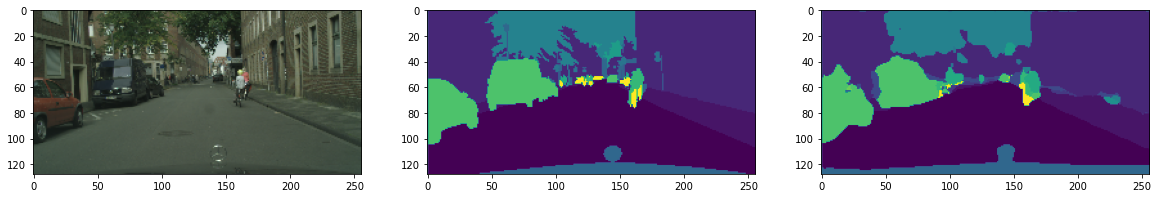

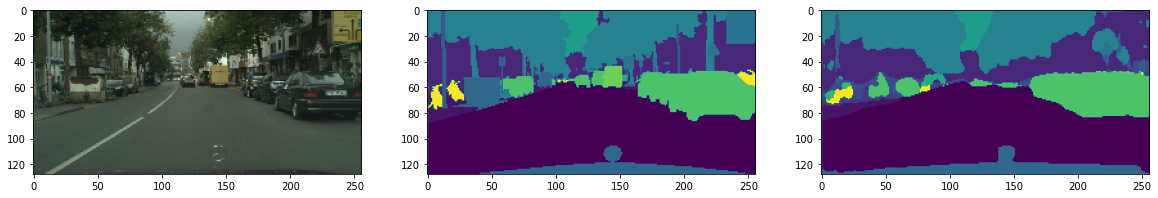

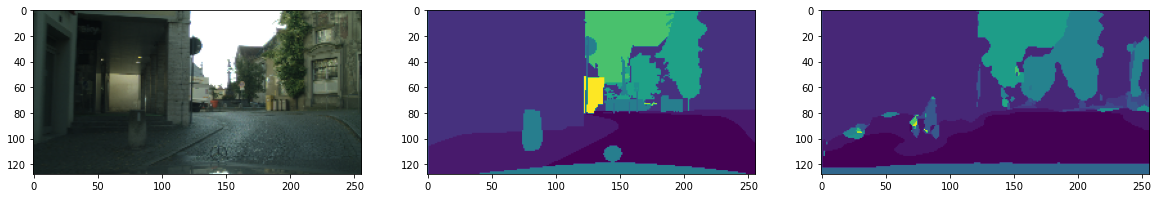

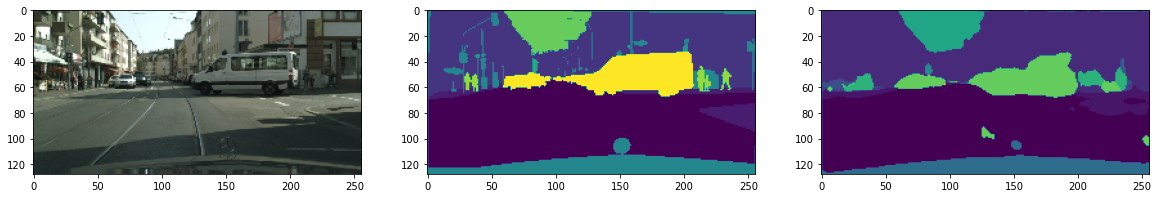

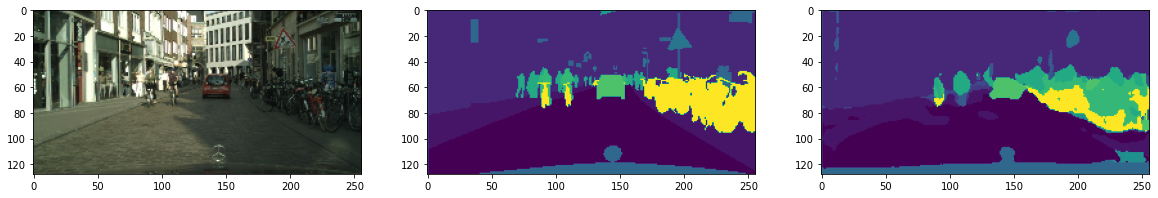

In [15]:
c = 0

# Show results
victim_model.eval()
with torch.no_grad():
    for img, lbl in val_loader:

        img, lbl = img.cuda(), lbl.cuda()
        lbl = lbl.view(1,1,img.shape[2],img.shape[3])
        pred = victim_model(img)

        plt.figure(figsize=(20,10))
        plt.subplot(1,3,1)
        plt.imshow(img[0].detach().cpu().numpy().transpose(1,2,0).astype(int))
        plt.subplot(1,3,2)
        plt.imshow(lbl[0,0].detach().cpu().numpy().astype(int))
        plt.subplot(1,3,3)
        plt.imshow(decode_pred(pred))
        plt.show()

        c += 1
        if c == 5: break

### Attack model

In [16]:
# Get model outputs

train_outputs = []
val_outputs = []


victim_model.eval()
with torch.no_grad():

    for img, _ in train_loader:
        img = img.cuda()
        pred = victim_model(img)

        train_outputs.append(pred.detach().cpu().numpy())

        if len(train_outputs) == 500: break

    for img, _ in val_loader:

        img = img.cuda()
        pred = victim_model(img)

        val_outputs.append(pred.detach().cpu().numpy())

        if len(val_outputs) == 500: break

WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes


In [17]:
train_outputs = np.array(train_outputs)[:,0,:,:,:]
val_outputs = np.array(val_outputs)[:,0,:,:,:]

In [18]:
train_labels = np.ones(len(train_outputs))
val_labels = np.zeros(len(val_outputs))

In [19]:
X = np.concatenate([train_outputs, val_outputs])
Y = np.concatenate([train_labels, val_labels])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
class AttackDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

In [22]:
attack_train_data = AttackDataset(X_train, Y_train)
attack_train_data_loader = torch.utils.data.DataLoader(attack_train_data, batch_size=8, shuffle=True)

attack_test_data = AttackDataset(X_test, Y_test)
attack_test_data_loader = torch.utils.data.DataLoader(attack_test_data, batch_size=8, shuffle=True)

In [26]:
from torchvision import models
import torch.nn as nn

attack_model = models.resnet50(pretrained=True)
attack_model.conv1 = torch.nn.Sequential(torch.nn.Conv2d(19, 3, 1), attack_model.conv1)
attack_model.fc = nn.Sequential(nn.Linear(2048, 1), nn.Sigmoid())
attack_model.cuda()

opt = torch.optim.Adam(attack_model.parameters(), lr=5e-5, betas=(0.9, 0.999))
criterion = nn.BCELoss()

for epoch in range(30):
        
    train_loss_data = []

    acc = 0.
    counter = 0

    # Training loop
    attack_model.train()
    for data, targets in attack_train_data_loader:

        data, targets = data.cuda(), targets.cuda()

        opt.zero_grad()

        output = attack_model(data)

        loss = criterion(output.float(), targets.float().view(8,1))

        loss.backward()
        opt.step()

        train_loss_data.append(loss.item())

        acc += torch.sum(output.float().round().view(data.shape[0],1) == targets.float().view(data.shape[0],1))/output.shape[0]
        counter += 1

    # Testing loop
    attack_model.eval()
    acc_test = 0
    counter_test = 0
    with torch.no_grad():
        for n, data_targets in enumerate(attack_test_data_loader):
                
            data, targets = data_targets
            data, targets = data.cuda(), targets.cuda()

            output = attack_model(data)

            acc_test += torch.sum(output.float().round().view(data.shape[0],1) == targets.float().view(data.shape[0],1))/output.shape[0]
            counter_test += 1


    print(
        epoch, 
        'epoch, training loss:', round(np.sum(np.array(train_loss_data))/len(train_loss_data),4), 
        ', training accuracy:', round((acc/counter).item(),4),
        ', testing accuracy:', round((acc_test/counter_test).item(),4),
    )

0 epoch, training loss: 0.6668 , training accuracy: 0.5875 , testing accuracy: 0.63
1 epoch, training loss: 0.3584 , training accuracy: 0.8537 , testing accuracy: 0.635
2 epoch, training loss: 0.2227 , training accuracy: 0.9125 , testing accuracy: 0.695
3 epoch, training loss: 0.2242 , training accuracy: 0.9237 , testing accuracy: 0.675
4 epoch, training loss: 0.1182 , training accuracy: 0.9562 , testing accuracy: 0.665
5 epoch, training loss: 0.1223 , training accuracy: 0.9512 , testing accuracy: 0.665
6 epoch, training loss: 0.1182 , training accuracy: 0.9613 , testing accuracy: 0.71
7 epoch, training loss: 0.127 , training accuracy: 0.955 , testing accuracy: 0.665
8 epoch, training loss: 0.0956 , training accuracy: 0.9688 , testing accuracy: 0.675
9 epoch, training loss: 0.1011 , training accuracy: 0.9638 , testing accuracy: 0.68
10 epoch, training loss: 0.104 , training accuracy: 0.9625 , testing accuracy: 0.63
11 epoch, training loss: 0.0638 , training accuracy: 0.9825 , testing a